# Predicting Our Next Successful Game

Author: James Clair

Date: Sun Mar 20

## Description

With our recent successes, one of the biggest problems that WCVG is faced with is deciding what next to do with our time and development resources.  We want to pick a game that will maximize our profits, expand our brand awareness, and crush the top charts.  There is a lot of guesswork involved in picking a new game to design and develop.  But in the information age, we can take a lot of the guessing out of that work.  And leverage our data science team to help make a data-driven decision that will significantly increase our chances of picking a successful game.  This notebook will be used to develop, implement, and document the following goals:

- Discover and implement a machine learning algorithm to predict what type of video game is most likely to succeed with a high degree of accuracy.
- Use the machine learning model to predict what type of video game is most likely to succeed with a high degree of accuracy.


## Loading And Cleaning The Data

Let's load the data:

In [1]:
# First the data can be retrieved here: https://www.kaggle.com/datasets/gregorut/videogamesales/download
# save as `vgsales.zip` in the same folder as this notebook file.
# Extract the zip

# These manual steps could be improved by automating the download of the file.
# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files(dataset='videogamesales', path='gregorut', unzip=True)


import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
sns.set_theme(style="darkgrid")

import pandas as pd
df = pd.read_csv("vgsales.csv")

df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


### Initial Observations:

Our data is now loaded into a Pandas `DataFrame` which allows us to easily manipulate our data in python friendly data structures.  The `describe()`, `info()`, and `head()` methods give us tons of information about our data:

1. There are 16,598 rows
1. There are 271 null values in Year column
1. There are 58 null values in Publisher column
1. Each row has a column for Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales.
    - Rank: This seems to be directly correlated with global sales.  Can potentially be used as a unique identifier.
    - Name: Name of the game.  Name has `Need for Speed: Most Wanted` has 12 duplicates, so it is NOT a unique identifier by itself.
    - Platform: Which hardware platform the game was released on.  Could be a tie breaker identifier if same game exists on multiple platforms.  
    - Year: Year the game was published.
    - Genre: A categorical assignment capturing the nature/content of the game.  Action is the largest category (genre) with 3316 games.  Though the same game could be listed several times on different platforms.
    - Publisher: Game studio that created and published the game.
    - NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales: Sales stats and Global_Sales will be our measure of success.
1. Each of the `*_Sales` columns are in millions and need multiplied by 1,000,000 to be represented as the dollar value.


### Dealing with Nulls

The null values could throw off the accuracy of our analysis and model.  Since there is only a few records w/ null values the easiest and cleanest way to deal with them is to remove them entirely:


In [3]:
# Find and drop rows with null values
df_not_null = df.dropna(axis=0)
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Exploring the Data

Now that we have loaded the data and removed null values we can do some initial analysis of our dataset.  Let's start with the Total Sales:



In [4]:
# df_not_null['Global_Sales'] = df_not_null['Global_Sales'].multiply(1000000) # can be used to 
total_sales = df_not_null['Global_Sales'].sum()
print("Total Sales: " + str(total_sales))

Total Sales: 8811.97


The total amount of all games sold according to our dataset is 8.8 Billion dollars (pretty staggering).  But how does the rest of our features: `Rank`, `Platform`, `Publisher`, `Year`, and `Genre`; relate to `Global_Sales` and could they be useful to our model accurately predict a successful game?  Each of the following sections will attempt to answer these questions.

### Exploring Rank

<AxesSubplot:xlabel='Rank'>

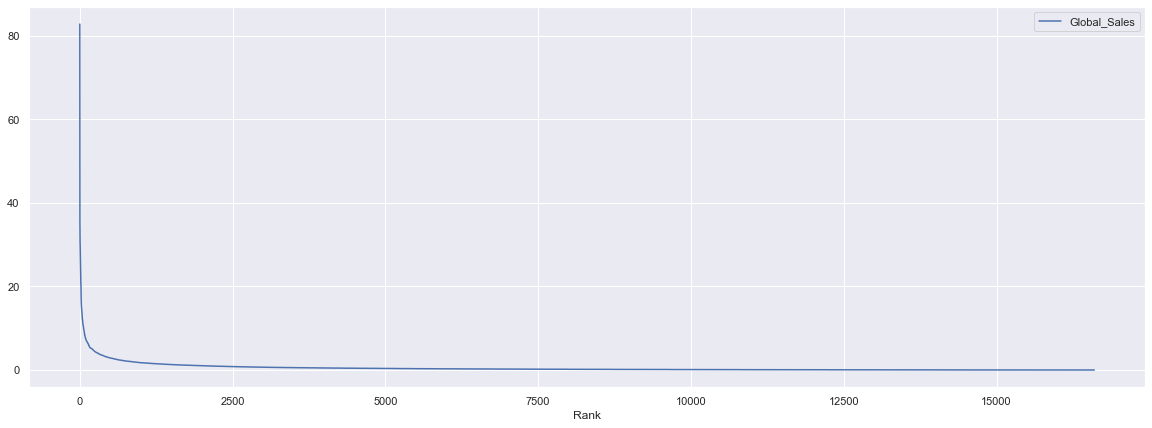

In [5]:
y = df_not_null['Global_Sales']
x1 = df_not_null.index
plt.figure(figsize=(22,8))
plt.xlabel('Rank')
plt.ylabel('Global_Sales')
plt.plot(x1, y)
plt.show()

The above graph illustrates how Global_Sales is skewed heavily based on Rank.   Also the first 500 ranked games account for a huge percentage of the total sales.  This indicates that a very small number of the 16k games make up a majority of the sales.

This also shows a smooth line with a smooth curve which indicates there is a direct correlation between increased Rank and increased Global_Sales.  This makes sense, games were assigned their rank based on how much their game made.  Unfortunately, while rank could be said to be a nearly perfect predictor of Global_Sales, it is only assigned once you know what the global sales are, which means that Rank depends on Global Sales and therfore can't predict the Global Sales.

We can drop or ignore the rank column.

In [6]:
df_not_null = df_not_null.drop(columns=['Rank'])

### Exploring Platform

Let's see how much each platform made in terms of sales.  

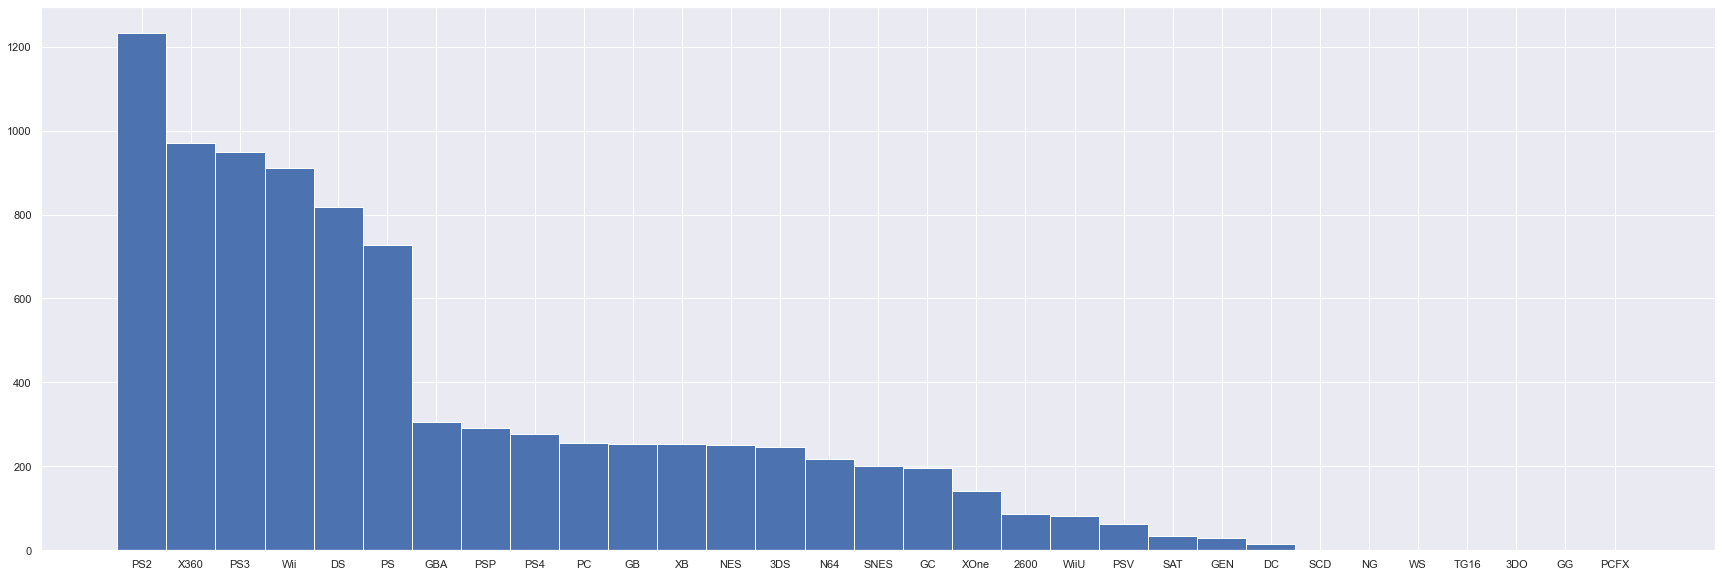

In [7]:
# Group the dataframe by Platform, sum the other fields based on the group, sort by global_sales
grouped_by_platform = df_not_null.groupby(['Platform']).sum().sort_values(by=['Global_Sales'], ascending=False)

# Use matplotlib to visualize Global Sales per platform
y = grouped_by_platform['Global_Sales']
x1 = grouped_by_platform.index

plt.figure(figsize=(30,10))
plt.bar(x1, y, width=1, linewidth=1)
plt.show()

The slope of the data is somewhat linear, with some significant jumps; which could indicate a linear relationship between the platform and the global sales.

PS2 is the clear leader with just above 1.2 billion in global sales and on the other end of the spectrum, several platforms made less than 200 milliion in global sales.  There are also the questions of when each platform was actively selling, prices at the time, technology differences, and accessibility challenges.

There are also several unknown platforms that I was unable to identify, however they can be removed as they make up a negligable number of records and are not good indicators of success:

 - NG, SCD, WS, 3DO, TG16, PCFX, GG, GC

Some of these platforms are no longer in development, so we will need to remove End of Life(EOL) platforms.  Since we are only concerned with platforms that are still being actively developed we can remove the following:

- Atari: 2600
- Sony: PS3, PS2, PS, PSP, PSV
- Nintendo: Wii, GBA, N64, 3DS, DS, SNES, WiiU, NES, GB
- Microsoft: X360, XB
- SEGA: SAT, GEN, DC

If we were to only keep platforms under active development in our data we would only have around 2k records in our sample out of the original 16k.  However, we could keep the EOL platforms that were part of a product line.  For example, xbox could be kept in the dataset because it has the actively developed Xbox One in the same product line that we can attribute it's success/sales to.  To help represent this abstraction we can create a platform_parent feature that maps the game to and platform to a particular platform parent:

- Sony: [PS4, PS3, PS2, PS, PSP, PSV]
- Nintendo: [Wii, GBA, N64, 3DS, DS, SNES, WiiU, NES, GB]
- Microsoft: [XOne, X360, XB]
- PC: [PC]

 
**Note:** The PC is one platform created by multiple software/hardware companies so it does NOT have a parent company with multiple platforms required to match the pattern. However, Since we do want to compare PC as a single platform against all Microsoft, Nintendo, and Sony sales we can just assign `PC` as the platform_parent.


#### Dropping Unknown and EOL Platforms


In [8]:
# Remove unknowns platforms
unknowns = ["NG", "SCD", "WS", "3DO", "TG16", "PCFX", "GG", "GC"]
print("Unknowns: " + str(unknowns))
df_no_platform_unknown = df_not_null[~df_not_null['Platform'].isin(unknowns)]
print("Unique Platforms after removing unknowns: " + str(df_no_platform_unknown["Platform"].unique()))

Unknowns: ['NG', 'SCD', 'WS', '3DO', 'TG16', 'PCFX', 'GG', 'GC']
Unique Platforms after removing unknowns: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT']


In [9]:
# Remove platforms that are EOL
eol_platforms = ['SAT', 'GEN', 'DC', '2600']
print("eol_platforms: " + str(eol_platforms))
df_eol_platforms = df_no_platform_unknown[~df_no_platform_unknown['Platform'].isin(eol_platforms)]
print("Unique Platforms after removing eol_platforms: " + str(df_eol_platforms["Platform"].unique()))

eol_platforms: ['SAT', 'GEN', 'DC', '2600']
Unique Platforms after removing eol_platforms: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' 'PSP' 'XOne' 'WiiU' 'PSV']


#### Visualizing Platform_Parent Abstraction

/var/folders/81/sfc2wkhn10g14vmg3wqv_p380000gn/T/ipykernel_75945/3590150950.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eol_platforms['Platform_Parent'] = df_eol_platforms['Platform'].apply(get_platform_parent)


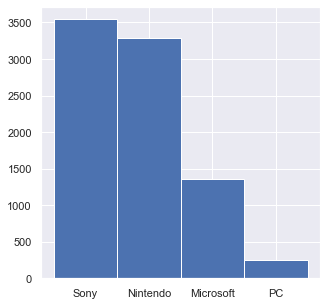

In [10]:
sony = ['PS4', 'PS3', 'PS2', 'PS', 'PSP', 'PSV']
nintendo = ['Wii', 'GBA', 'N64', '3DS', 'DS', 'SNES', 'WiiU', 'NES', 'GB']
microsoft = ['XOne', 'X360', 'XB']
pc = ['PC']

def get_platform_parent(platform):
    if (sony.count(platform) > 0):
        return "Sony"
    elif (nintendo.count(platform) > 0):
        return "Nintendo"
    elif (microsoft.count(platform) > 0):
        return "Microsoft"      
    elif (pc.count(platform) > 0):
        return "PC"
    else:
        print("Error: The platform: " + platform + ", wasn't found.")

#Add a column to the dataframe that will hold the `Platform_Parent` according to the map above
df_eol_platforms['Platform_Parent'] = df_eol_platforms['Platform'].apply(get_platform_parent)

# Group the dataframe by Platform_Parent, sum the other fields based on the group, sort by global_sales
grouped_by_platform_parent = df_eol_platforms.groupby(['Platform_Parent']).sum().sort_values(by=['Global_Sales'], ascending=False)

# Use matplotlib to visualize Global Sales per platform_parent
y = grouped_by_platform_parent['Global_Sales']
x1 = grouped_by_platform_parent.index

plt.figure(figsize=(5,5))
plt.bar(x1, y, width=1, linewidth=1)
plt.show()

While platform_parent is interesting to see being in the video game industry, it isn't particularly useful other than serving as an indication of where we should attribute success of platforms that are EOL, but part of an actively developed line of products.  It only contains 4 unique categories and relates directly to the Platforms themseleves which when used together may cause multicolinearity and throw off the accuracy of our model's results.  Therefore we will just be using this feature informationally and can drop it from our dataset before proceeding.

In [11]:
df_eol_platforms = df_eol_platforms.drop(columns=['Platform_Parent'])

### Exploring Publisher

Publisher is NOT a factor that we can control, in otherwords we will be the publisher of our own game. So we can essentially get rid of this column.

In [12]:
# Remove the Publisher column
df_no_publisher = df_eol_platforms.drop(columns=['Publisher'])
df_no_publisher.head()


,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


### Exploring Year

Let's explore the relationship between our Year feature and 'Global_Sales'.

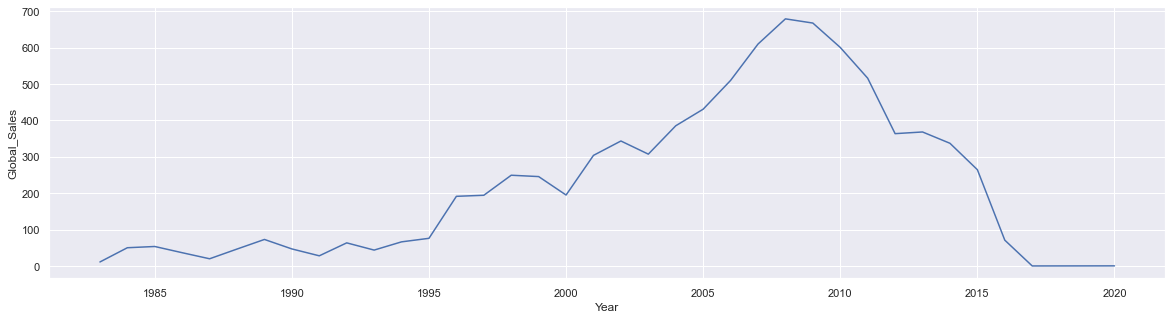

In [13]:
# Change year to int rather than float
df_no_publisher['Year'] = df_no_publisher['Year'].astype(int)

# Group the dataframe by Year, sum the other fields based on the group, sort by global_sales
grouped_by_year = df_no_publisher.groupby(['Year']).sum().sort_values(by=['Year'], ascending=False)

# Use matplotlib to visualize Global Sales per Year
y = grouped_by_year['Global_Sales']
x1 = grouped_by_year.index

plt.figure(figsize=(20,5))
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.plot(x1, y)
plt.show()



Sales steadily increased until 2008 where they began to decline, leading me to believe that something occurred during this time period.

We don't have the ability to control the year we publish our game, however we should keep in mind that our total predicted sales may differ considerably because the market has been trending downwards. There is also a tail on the right side of our data at 0, it looks like we have no data passed 2016.  We should remove these outlier years where no sales were recorded.

If year does correlate strongly to predicting global sales, it will show us how important it could be to use up to date historical sales data from our company to help predict our own performance as a company.

### Exploring Genre

Let's explore the relationship between our Genre feature and 'Global_Sales'.

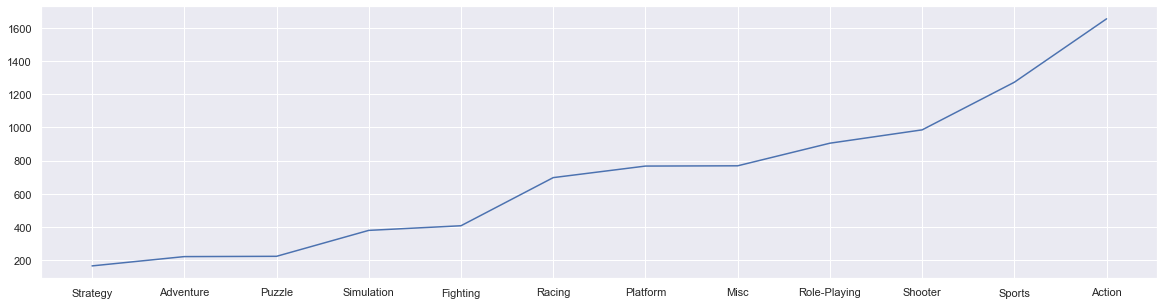

In [14]:
# Group the dataframe by Genre, sum the other fields based on the group, sort by global_sales
# grouped_by_genre = df_no_publisher.groupby(['Genre'])
grouped_by_genre = df_no_publisher.groupby(['Genre']).sum().sort_values(by=['Global_Sales'], ascending=True)

# Use matplotlib to visualize Global Sales per genre
y = grouped_by_genre['Global_Sales']
x1 = grouped_by_genre.index

plt.figure(figsize=(20,5))
plt.plot(x1, y)
plt.show()


Again we see a heavy affect on number of sales.  With Action, Sports, and Shooters as the top three Genre's by global sales.  This gradual climb could indicate a linear relationship with global sales and potentially a good predicting attribute of our game data.

### Exploring Regional *_Sales Columns

There are 5 features within our data that have to do with sales `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, and `Global_Sales`.  The first 3 features in that list are regional sales and the 4th looks to be a miscellaneous bucket for sales unattributed to a region.  Now, we could either attempt draw a correlation between these features and verify that relationship through testing, i.e.: `NA + EU + JP + Other = Global`.  Making the assumption that the game will be sold world-wide and we are more concerned with developing a game that is successful regardless of what region those sales are attributed to, we can just ignore/drop sales features other than Global Sales from this point forward.

In [15]:
df_no_regional_sales = df_no_publisher.drop(columns=['Other_Sales', 'Name']) # 'NA_Sales', 'EU_Sales', 'JP_Sales', 

# create our final cleaned df object
clean_sales_data = df_no_regional_sales.copy(deep=True)

# Create dependent variable, which should be reusable between the models
# Remove: Rank and Global_Sales, Reason: perfect predictors of Global Sales
clean_reg_data = clean_sales_data.copy(deep=True).drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales'])
clean_reg_data.head()

,Platform,Year,Genre,Global_Sales
0,Wii,2006,Sports,82.74
1,NES,1985,Platform,40.24
2,Wii,2008,Racing,35.82
3,Wii,2009,Sports,33.00
4,GB,1996,Role-Playing,31.37



### Summary of Exploration and Cleaning

- Converted year to `int`
- Removed the following columns: `['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', ]`
- Came up with a strategy for dealing with EOL platforms while retaining a large enough dataset to perform regression analysis on, i.e. `Sony`, `Nintendo`, `Microsoft`, and `PC`
- Removed negligible unknown and EOL platforms: `["NG", "SCD", "WS", "3DO", "TG16", "PCFX", "GG", "GC"] + ['SAT', 'GEN', 'DC', '2600']`
- Learned that Global_Sales is highly affected by Platform, Year, and Genre.  These will likely be our input parameters/features.  And Global_Sales will be our indicator of success that we will optimize for. 
- Learned that Year may be a confounding variable as global sales have been decreasing since 2008, but we are unsure of the reason.


## Data Normalization And Machine Learning


After doing some further research on performing sales forecasting machine learning, I found that sales forecasting usually uses history or uses some sort of measure of time, for instance years and forecasts the sales based on what it thinks the next year's performance will be.  As we concluded earlier, our `Year` feature isn't controllable and our dataset is missing the last 6 years of data.  But, the point is that sales forecasting can be done using linear regression models, linear regression's having a much lower complexity to implement, and coupled with the potential linear relationships we found in our above data exploration; I have decided to implement a linear regression for our model of choice.

Now that we have properly cleaned our data we can perform a simple OLS LinearRegression.  The following steps will be taken for each feature 'Genre', 'Year', and 'Platform':

1. Set the dependent variable to the Global Sales series and drop the series from the original DataFrame.
2. Split the data into test and train datasets (a random 30% of the data is used for test data).
3. Perform the LinearRegression 
4. Convert those predictions back to a human readible value.
5. Outputting the Accurracy, Mean Squared Error, Variance Score, and predictions.
6. Perform the same regression in seaborn so we can visualize the linearity and regression.


#### Create preprocessing() and runRegression() Methods


In [16]:
# Description: Method to preprocess the data.  Preprocessing consists of applying a LabelEncoder,
def preprocess(dataframe, feature):
    y = dataframe['Global_Sales']

    # LabelEncode the `feature`
    le = LabelEncoder()
    dataframe[feature] = le.fit_transform(dataframe[feature].astype('str'))
    dataframe = dataframe.drop(columns=['Global_Sales'])
    x_train, x_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.30) # Randomly split the data into test and train datasets

    # Apply a StandardScaler to each feature on each test & train datasets
    transformer_x = StandardScaler().fit(x_train)
    transformer_x_test = StandardScaler().fit(x_test)
    x_train = transformer_x.transform(x_train)
    x_test = transformer_x_test.transform(x_test)

    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
    transformer_y = StandardScaler().fit(y_train)
    transformer_y_test = StandardScaler().fit(y_train)
    y_train = transformer_y.transform(y_train)
    y_test = transformer_y_test.transform(y_test)

    return x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le


# Description: Run the linear regression on the preprocessed data, revert scaling, revert encoding, and print results
def runRegression(x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le, feature):
    reg = LinearRegression()
    reg.fit(x_train,y_train)

    # Make predictions using the model
    y_pred = reg.predict(x_test)
    train_accuracy = reg.score(x_train, y_train)
    test_accuracy = reg.score(x_test, y_test)

    # revert scaling
    y_train = transformer_y.inverse_transform(y_train)
    y_test = transformer_y_test.inverse_transform(y_test)
    y_pred = transformer_y_test.inverse_transform(y_pred)

    # revert label encoding
    x_train = le.inverse_transform(transformer_x.inverse_transform(x_train)[:,0].astype(int))
    x_test = le.inverse_transform(transformer_x_test.inverse_transform(x_test)[:,0].astype(int))

    # Print out results of Regression
    print ('Train Accuracy : {:.2f}%'.format(train_accuracy*100))
    print ('Test Accuracy : {:.2f}%'.format(test_accuracy*100))
    print ('X Test Values :' + str(x_test))
    print ('Y Test Values :' + str(y_test))
    print ('Y Predictions :' + str(y_pred))
    print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
    print('Variance Score: %.2f'% r2_score(y_test, y_pred))






#### Predict Global_Sales Given A Genre

In [17]:
linear_reg_data = clean_reg_data.copy(deep=True)
linear_reg_data = linear_reg_data.drop(columns=['Platform','Year'])
# by_genre = linear_reg_data.groupby(['Genre']).sum().reset_index()

# Call preprocess w/ 'Genre' dataframe and return preprocessed data to runRegression to run our LinearRegression
x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le = preprocess(linear_reg_data, 'Genre')
runRegression(x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le, 'Genre')

Train Accuracy : 0.11%
Test Accuracy : -0.10%
X Test Values :['Action' 'Shooter' 'Action' ... 'Action' 'Racing' 'Action']
Y Test Values :[[0.08]
 [0.84]
 [0.19]
 ...
 [0.92]
 [1.44]
 [0.03]]
Y Predictions :[[0.47608702]
 [0.58861874]
 [0.47608702]
 ...
 [0.47608702]
 [0.56048581]
 [0.49015349]]
Mean squared error: 2.44
Variance Score: -0.00


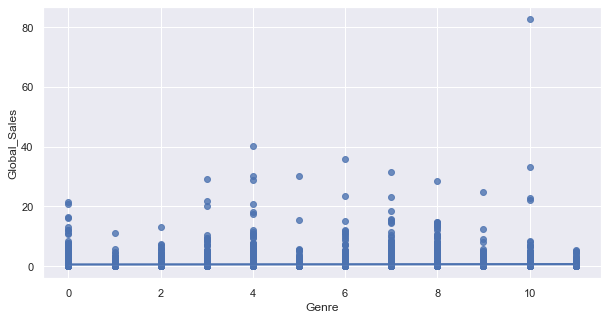

In [18]:
plt.figure(figsize=(10, 5))
sns.regplot(x="Genre", y="Global_Sales", data=linear_reg_data)
plt.show()

#### Linear Regression on Sales Summarized by Year

In [19]:

linear_reg_data = clean_reg_data.copy(deep=True)
linear_reg_data = linear_reg_data.drop(columns=['Genre','Platform'])

# Call preprocess w/ 'Year' dataframe and return preprocessed data to runRegression to run our LinearRegression
x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le = preprocess(linear_reg_data, 'Year')
runRegression(x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le, 'Year')

Train Accuracy : 0.67%
Test Accuracy : 0.84%
X Test Values :['2008' '2006' '2003' ... '2012' '2011' '2006']
Y Test Values :[[0.17]
 [0.06]
 [0.07]
 ...
 [0.17]
 [0.03]
 [0.05]]
Y Predictions :[[0.51543983]
 [0.56378252]
 [0.63629654]
 ...
 [0.41875446]
 [0.4429258 ]
 [0.56378252]]
Mean squared error: 2.76
Variance Score: 0.01


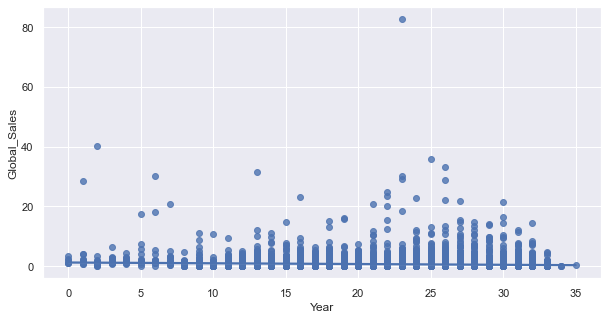

In [20]:
plt.figure(figsize=(10, 5))
sns.regplot(x="Year", y="Global_Sales", data=linear_reg_data)
plt.show()

#### Linear Regression on Sales Summarized by Platform

In [21]:

linear_reg_data = clean_reg_data.copy(deep=True)
linear_reg_data = linear_reg_data.drop(columns=['Genre','Year'])

# Call preprocess w/ 'Platform' dataframe and return preprocessed data to runRegression to run our LinearRegression
x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le = preprocess(linear_reg_data, 'Platform')
runRegression(x_train, transformer_x, x_test, transformer_x_test, y_train, transformer_y, y_test, transformer_y_test, le, 'Platform')

Train Accuracy : 0.05%
Test Accuracy : 0.02%
X Test Values :['PS2' 'PS' 'PS2' ... '3DS' 'SNES' 'XB']
Y Test Values :[[2.78]
 [0.19]
 [0.03]
 ...
 [0.6 ]
 [0.1 ]
 [0.05]]
Y Predictions :[[0.55504943]
 [0.54802482]
 [0.55504943]
 ...
 [0.5058772 ]
 [0.59017244]
 [0.61827086]]
Mean squared error: 2.82
Variance Score: 0.00


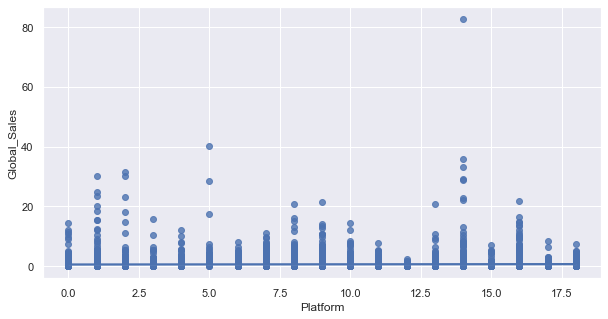

In [22]:
plt.figure(figsize=(10, 5))
sns.regplot(x="Platform", y="Global_Sales", data=linear_reg_data)
plt.show()

## Conclusions

As you can see the 3 linear regressions above for `Platform`, `Genre`, and `Year` the accuracy was about 0% or worse.  Unfortunately, looking at the results above you can see further indication that our data is most likely not well suited for predicting GlobalSales based off of a LinearRegression.  Observations:

Genre Regression:
- Accuracy: Very low, usually around -10% - 40%, varies highly
- Plot: Data is in columns, categorical values are creating non-linear relationships between the points on the graph.

Year Regression:
- Accuracy: Very low, usually around -10% - 40%, varies highly
- Plot: Data is in columns, categorical values are creating non-linear relationships between the points on the graph.

Platform Regression:
- Accuracy: Very low, usually around -10% - 10%.
- Plot: Data is in columns, categorical values are creating non-linear relationships between the points on the graph.

Did we meet our objectives?
- Discover and implement a machine learning algorithm to predict what type of video game is most likely to succeed with a high degree of accuracy.
  - Result: FAILED
  - Reason: We were able to discover and implement a machine learning algorithm to predict the Global_Sales of a video game given one of the following attributes: `Genre`, `Platform`, or `Year`.  However, all of our models demonstrated low accuracy and a high degree of fluxuation in accuracy.
- Use the machine learning model to predict what type of video game is most likely to succeed with a high degree of accuracy.
  - Result: FAILED
  - Reason: We were able to predict the Global_Sales of a video game given one of the following attributes: `Genre`, `Platform`, or `Year`.  However, all of our models demonstrated low accuracy and a high degree of fluxuation in accuracy.

Why did we fail our objectives, what did we learn and how could we improve?
- LabelEncoders are notorious for creating false relationships.  I refactored the solution a few times using a few combinations of OneHotEncoding, Dummy Variables, and MultiLabelBinarizer, as well as w/ and w/o a StandardScaler.  The highest accuracy I was able to achieve on the full dataset was 4% - 8% accurracy and would have required a refactor.  See Appendix: "A. One Hot Encoding - (Status: Abandoned)",  and "C. (Dummy Encoding OR MultiLabelBinarizer) AND LinearRegression; (Status: Abandoned AND Broken, between two different tests.)" for how these tests were implemented.
- Our dataset didn't contain recent data or data about our own company's sales history.  With sales forecasting data it is very important to have up to date datasets.
- Due to the high number of categorical variables it might have made sense to try to turn our question into a yes/no answer and employ a Logistic Regression.  For instance, We could have segmented Global_Sales into any predicted sales above a certain value equals a success and anything below equals a fail.
- Publisher is not a feature that can be controlled in this case, however our own companies sales data could look very different from the overall industry.
- Ran out of time to implement other algorithm's that may be better suited for this dataset and problem.


While our Machine Learning approach didn't pan out, we did learn ALOT of useful information, after performing statistical analysis in the `Data Exploration` section, the datascience team has come up with a recommendation that WCVG will have the highest chances of success if they develop a game in one of the top two Genres or Platforms:

Genre: Action, Sports
Platform: Playstation or Nintendo




## Appendix


### A. One Hot Encoding - (Status: Abandoned)

```
df_no_regional_sales['Sony'] = df_no_regional_sales['Platform_Parent'].map({'Sony': 1}).fillna(0).astype(int)
df_no_regional_sales['Nintendo'] = df_no_regional_sales['Platform_Parent'].map({'Nintendo': 1}).fillna(0).astype(int)
df_no_regional_sales['Microsoft'] = df_no_regional_sales['Platform_Parent'].map({'Microsoft': 1}).fillna(0).astype(int)
df_no_regional_sales['PC'] = df_no_regional_sales['Platform_Parent'].map({'PC': 1}).fillna(0).astype(int)

df_no_regional_sales['Action'] = df_no_regional_sales['Genre'].map({'Action': 1}).fillna(0).astype(int)
df_no_regional_sales['Sports'] = df_no_regional_sales['Genre'].map({'Sports': 1}).fillna(0).astype(int)
df_no_regional_sales['Shooter'] = df_no_regional_sales['Genre'].map({'Shooter': 1}).fillna(0).astype(int)
df_no_regional_sales['Role-Playing'] = df_no_regional_sales['Genre'].map({'Role-Playing': 1}).fillna(0).astype(int)
df_no_regional_sales['Misc'] = df_no_regional_sales['Genre'].map({'Misc': 1}).fillna(0).astype(int)
df_no_regional_sales['Platform'] = df_no_regional_sales['Genre'].map({'Platform': 1}).fillna(0).astype(int)
df_no_regional_sales['Racing'] = df_no_regional_sales['Genre'].map({'Racing': 1}).fillna(0).astype(int)
df_no_regional_sales['Fighting'] = df_no_regional_sales['Genre'].map({'Fighting': 1}).fillna(0).astype(int)
df_no_regional_sales['Simulation'] = df_no_regional_sales['Genre'].map({'Simulation': 1}).fillna(0).astype(int)
df_no_regional_sales['Puzzle'] = df_no_regional_sales['Genre'].map({'Puzzle': 1}).fillna(0).astype(int)
df_no_regional_sales['Adventure'] = df_no_regional_sales['Genre'].map({'Adventure': 1}).fillna(0).astype(int)
df_no_regional_sales['Strategy'] = df_no_regional_sales['Genre'].map({'Strategy': 1}).fillna(0).astype(int)

df_no_regional_sales.info()
```

### B. Logistic Regression - (Status: Abandoned)

```python
y = df_no_regional_sales['Global_Sales']
x1 = df_no_regional_sales[['Sony', 'Nintendo', 'Microsoft', 'PC', 'Action', 'Sports', 'Shooter', 'Role-Playing',
                          'Misc', 'Platform', 'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']]

# plt.scatter(x1,y)
# plt.xlabel('Size',fontsize=20)
# plt.ylabel('Price',fontsize=20)
# plt.show()

#Logistic regression:
# x = sm.add_constant(x1)
# reg_log = sm.Logit(y,x)
# results_log = reg_log.fit()

# # Get the regression summary
# results_log.summary()

#Linear regression:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()
```

### C. (Dummy Encoding OR MultiLabelBinarizer) AND LinearRegression; (Status: Abandoned AND Broken, between two different tests.)

```
data = clean_reg_data.copy(deep=True)
# data = data.drop(columns=['Global_Sales'])


data.head(10)

categorical_cols = []
categorical_cols.append('Platform')
categorical_cols.append('Genre')
categorical_cols.append('Year')

# data_frame = pd.get_dummies(data, columns = categorical_cols)#, drop_first=True)

data = data.groupby(categorical_cols).sum()
data.reset_index(inplace=True)
data.head()

mlb = MultiLabelBinarizer()
data = mlb.fit(data['Global_Sales'])

scaler = StandardScaler()
scaler.fit(data_frame) # compute mean and std
data_frame = scaler.transform(data_frame) # standardize by centering and scaling
x_train, x_test, y_train, y_test = train_test_split(data_frame, y, test_size=0.30) # Randomly split the data into test and train datasets
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
train_accuracy = reg.score(x_train, y_train)
test_accuracy = reg.score(x_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(train_accuracy*100))
print ('Test Accuracy : {:.2f}%'.format(test_accuracy*100))

```

### D. Applying StandardScaler to pandas DF using DataFrameMapper

```
# Create a new DataFrame with the features scaled with a StandardScaler
mapper = DataFrameMapper([(by_genre.columns, StandardScaler())])
scaled_features = mapper.fit_transform(by_genre.copy(), 4)
by_genre = pd.DataFrame(scaled_features, index=by_genre.index, columns=by_genre.columns)
scaled_features = mapper.fit_transform(by_year.copy(), 4)
by_year = pd.DataFrame(scaled_features, index=by_year.index, columns=by_year.columns)
scaled_features = mapper.fit_transform(by_platform.copy(), 4)
by_platform = pd.DataFrame(scaled_features, index=by_platform.index, columns=by_platform.columns)

by_genre.head(20) # Print sample of newly scaled features
```

No feature to inverse this action: https://github.com/scikit-learn-contrib/sklearn-pandas/pull/133
